In [1]:
#利用python模拟浏览器发起HTTP请求访问百度首页
from urllib.request import urlopen
url = "http://www.baidu.com/"
response = urlopen(url)
print(response.geturl())
print(response.info())#返回元信息
print(response.getcode())#返回请求状态码

http://www.baidu.com/
Bdpagetype: 1
Bdqid: 0x9d025892000039da
Cache-Control: private
Content-Type: text/html;charset=utf-8
Date: Wed, 16 Dec 2020 11:06:15 GMT
Expires: Wed, 16 Dec 2020 11:05:20 GMT
P3p: CP=" OTI DSP COR IVA OUR IND COM "
P3p: CP=" OTI DSP COR IVA OUR IND COM "
Server: BWS/1.1
Set-Cookie: BAIDUID=E23CD5C0F34D742EE1C2FD583C2CFBBD:FG=1; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com
Set-Cookie: BIDUPSID=E23CD5C0F34D742EE1C2FD583C2CFBBD; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com
Set-Cookie: PSTM=1608116775; expires=Thu, 31-Dec-37 23:55:55 GMT; max-age=2147483647; path=/; domain=.baidu.com
Set-Cookie: BAIDUID=E23CD5C0F34D742EEBBAD8ED985BFD7E:FG=1; max-age=31536000; expires=Thu, 16-Dec-21 11:06:15 GMT; domain=.baidu.com; path=/; version=1; comment=bd
Set-Cookie: BDSVRTM=0; path=/
Set-Cookie: BD_HOME=1; path=/
Set-Cookie: H_PS_PSSID=1439_33306_31254_32974_33284_33313_33312_33311_33310_33309_26350_331

In [18]:
html = response.read()
html = html.decode("UTF-8")
print(html)

<!DOCTYPE html><!--STATUS OK-->


    <html><head><meta http-equiv="Content-Type" content="text/html;charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta content="always" name="referrer"><meta name="theme-color" content="#2932e1"><meta name="description" content="全球最大的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"><link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" /><link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" /><link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg"><link rel="dns-prefetch" href="//dss0.bdstatic.com"/><link rel="dns-prefetch" href="//dss1.bdstatic.com"/><link rel="dns-prefetch" href="//ss1.bdstatic.com"/><link rel="dns-prefetch" href="//sp0.baidu.com"/><link rel="dns-prefetch" href="//sp1.baidu.com"/><link rel="dns-prefetch" href="//sp2.baidu.com"/><title>百度一下，你就知道</title><style index="newi" type="text/css">

In [14]:
# ====================================================
# 使用 正则表达式 抓取名言网的名言
# ====================================================
from urllib.request import URLError
import re

url = "http://quotes.toscrape.com/"

try:
    response = urlopen(url)
except:
    print("请求URL出现问题")
else:
    html = response.read()
    html = html.decode("UTF-8")
    print(html)

    # 抓取网页内容中的 名言标签， 利用正则的分组技术，只保留 html 内容
    quotes = re.findall('<span class="text" itemprop="text">(.*)</span>', html)
   #列表 print(type(quotes))
    for x in quotes:
        print(x)
    #x两边的字符串都按照参数的字符进行匹配，如果匹配到，则删除。
        print(x.strip("“T”"))

    # 抓取 作者信息
    author = re.findall('<small class="author" itemprop="author">(.*)</small>', html)
    for y in author:
        print(y)

    tags = re.findall('<div class="tags">(.*?)</div>', html, re.RegexFlag.DOTALL)
    print(len(tags))
    true_tags = []
    for tag in tags:
        # print(tag)
        atag = re.findall('<a class="tag" href=".*">(.*)</a>', tag)
        # print(atag)
        true_tags.append(atag)

    last = []
    for index in range(len(quotes)):
        q = quotes[index].strip("“”")
        a = author[index]
        t = ",".join(true_tags[index])
        print(q, a, t, sep="\t\t")

finally:
    print("请求完毕")

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin
The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.		Albert Einstein		change,deep-thoughts,thinking,world
It is our choices, Harry, that show what we truly are, far more than our abilities.		J.K. Rowling		abilities,choices
There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.		Albert Einstein		inspirational,life,live,miracle,miracles
The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.		Jane Austen		aliteracy,books,classic,humor
Imperfection is beauty, madness is genius and it&#39;s better to be absolutely ridiculous than absolutely boring.		Marilyn Monroe		be-yourself,inspirational
Try not to become a man of success. Rather become a man of value.		Albert E

In [5]:
# ====================================================
# 使用 BeautifulSoup4 抓取
# ====================================================

from bs4 import BeautifulSoup
url = "http://quotes.toscrape.com/"
response = urlopen(url)
# html = response.read().decode("UTF-8")
# print(html)

# 在构造 BeautifulSoup 对象的时候，需要传入两个参数，
# 第一个： 浏览器返回的response对象
# 第二个： 需要一个解析器， 解析器有很多种，但是通常使用默认的 html.parser 即可
# BeautifulSoup的解析器还有lxml和html5lib等
bs = BeautifulSoup(response, "html.parser")

# 抓取 名言
spans = bs.select("span.text")
true_quotes = []
for one in spans:
    # print(one.get("text", "aaa"))
    quote = one.text
    # print("abcdeeee e".strip("abe"))  去除两边的指定字符
    quote = quote.strip("“”")
    true_quotes.append(quote)
    # print(one.text)


# 抓取作者
true_authors = []
authors = bs.select("small.author")
for author in authors:
    true_authors.append(author.text)
    # print(author.text)


# 抓取标签
tags = bs.select("div.tags")
true_tags = []
for tag in tags:
    a = tag.select("a.tag")

    # 第一，直接打印
    # print(author)

    # 第二，把所有的标签组合到一个list中
    # tagss = []
    # for tag in a:
    #     tagss.append(tag.text)
    # print(tagss)

    # 第三： 使用生成器的语法规则，生成列表
    mytagss = [atag.text for atag in a]
    result = ",".join(mytagss)
    true_tags.append(result)
    # print(result)

print(true_authors)
print(true_tags)
print(true_quotes)

for index in range(len(true_quotes)):
    print("\t".join([true_authors[index], true_tags[index], true_quotes[index]]))


['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']
['change,deep-thoughts,thinking,world', 'abilities,choices', 'inspirational,life,live,miracle,miracles', 'aliteracy,books,classic,humor', 'be-yourself,inspirational', 'adulthood,success,value', 'life,love', 'edison,failure,inspirational,paraphrased', 'misattributed-eleanor-roosevelt', 'humor,obvious,simile']
['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.', 'It is our choices, Harry, that show what we truly are, far more than our abilities.', 'There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.', 'The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.', "Imperfection is beauty, madness is genius and it's better to be abs

In [4]:
# ====================================================
# 使用 xpath 抓取
# ====================================================

from lxml import etree

url = "http://quotes.toscrape.com/"
response = urlopen(url)
html_content = response.read().decode("UTF-8")
#print(html)
tree=etree.HTML(html_content)
spans=tree.xpath("/html/body/div/div[2]/div[1]/div/span[1]")
print(len(spans),type(spans[0]))

for span in spans:
    print(span.text)

10 <class 'lxml.etree._Element'>
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


In [13]:
conda install -c conda-forge altair vega_datasets

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\software\Anaconda3

  added / updated specs:
    - altair
    - vega_datasets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    vega_datasets-0.9.0        |     pyhd3deb0d_0         179 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m
  vega_datasets      conda-forge/noarch::vega_datasets-0.9.0-pyhd3deb0d_0





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [20]:
import altair as alt
from vega_datasets import data

source = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=300,
    height=180
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj)
          for proj in projections]

alt.concat(*charts, columns=2)

alt.ConcatChart(...)

In [5]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

alt.Chart(...)

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')


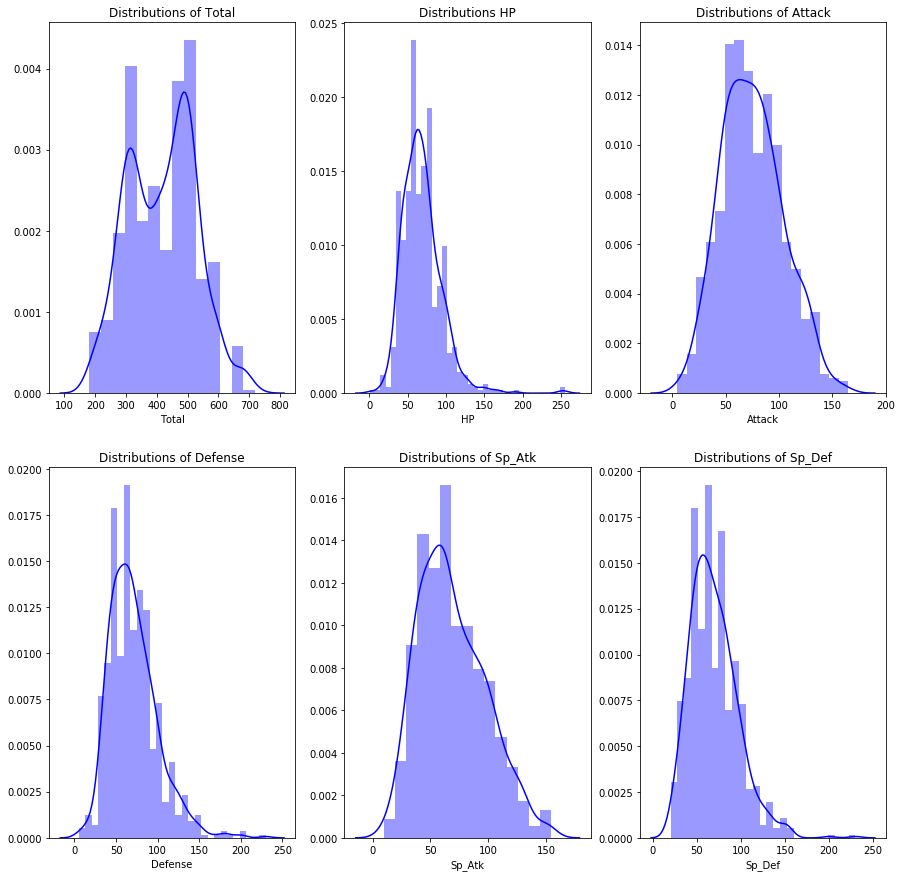

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('C:\\Users\\14480\\Desktop\\pokemon_alopez247.csv')
print(df.columns)
fig,axes=plt.subplots(2,3,figsize=(15,15))
#g=sns.FacetGrid(df,col="Total")
#g=g.map(plt.hist,"Total",bins=20,color="r")

#默认同时绘制（直方图与核密度估计）
sns.distplot(df['Total'],ax=axes[0,0],color="b")
axes[0,0].set_title('Distributions of Total')
df['Total'].mean()#均值
df['Total'].var()#方差

sns.distplot(df['HP'],ax=axes[0,1],color="b")
axes[0,1].set_title('Distributions HP')

sns.distplot(df['Attack'],ax=axes[0,2],color="b")
axes[0,2].set_title('Distributions of Attack')

sns.distplot(df['Defense'],ax=axes[1,0],color="b")
axes[1,0].set_title('Distributions of Defense')

sns.distplot(df['Sp_Atk'],ax=axes[1,1],color="b")
axes[1,1].set_title('Distributions of Sp_Atk')

sns.distplot(df['Sp_Def'],ax=axes[1,2],color="b")
axes[1,2].set_title('Distributions of Sp_Def')
#sns.kdeplot(df['Total'],ax=axes[1],shade=True)
plt.show()


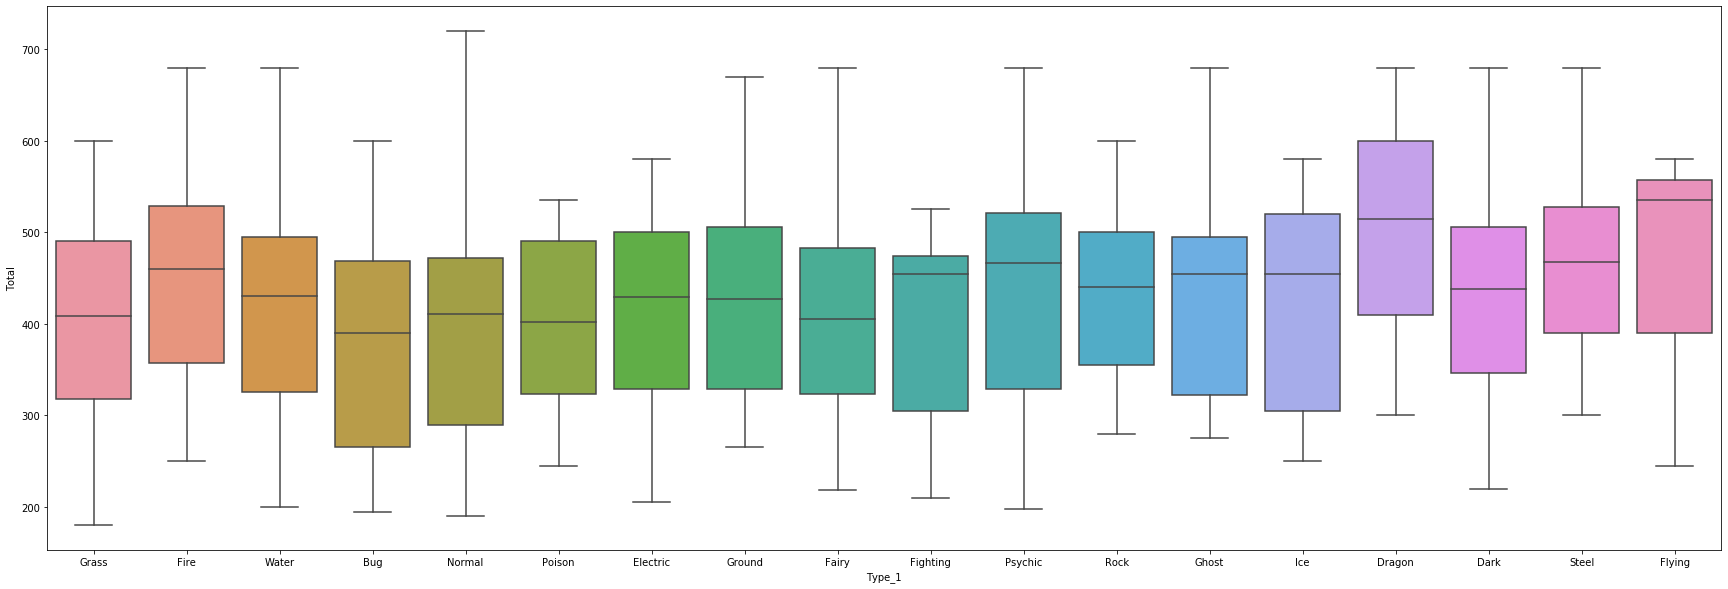

In [8]:
#绘制箱型图和小提琴图
plt.figure(figsize=(30,10))
sns.boxplot(x="Type_1",y="Total",data=df)
plt.show()

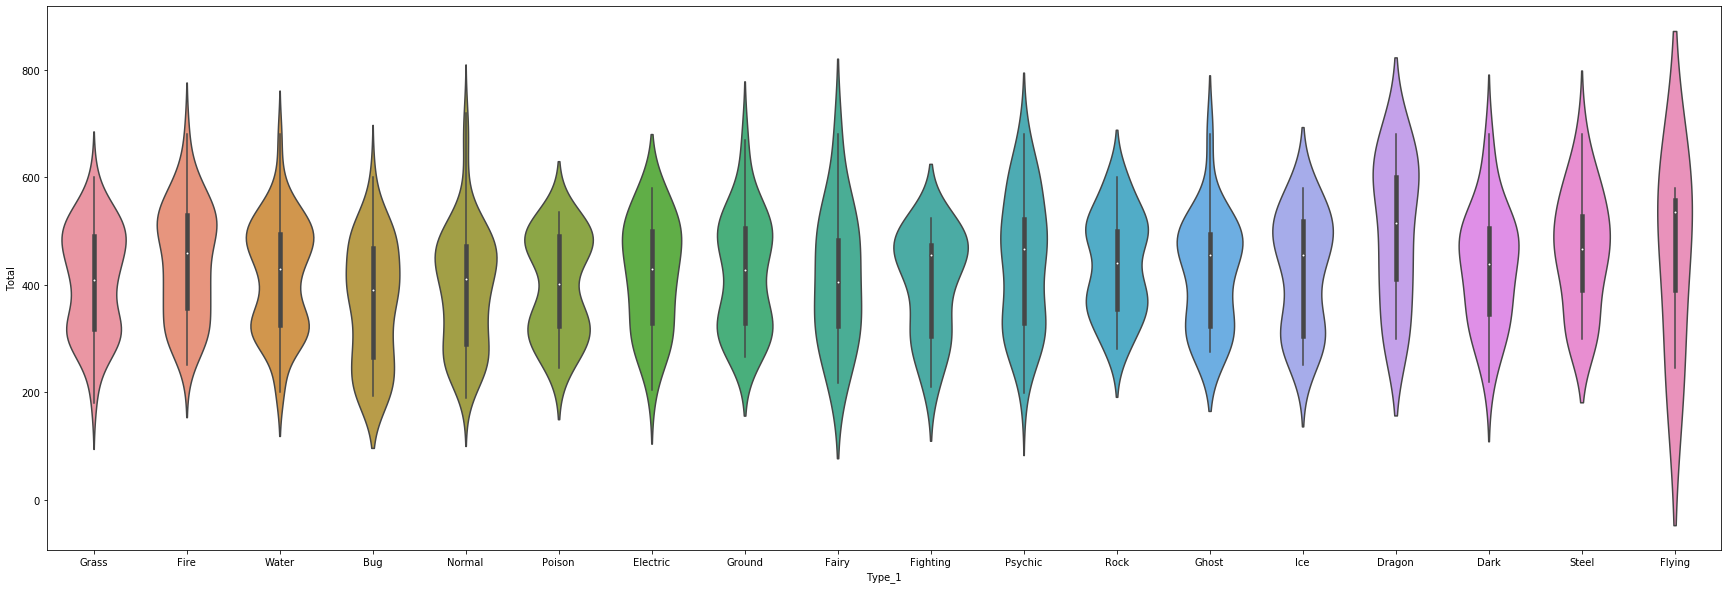

In [9]:
plt.figure(figsize=(30,10))
sns.violinplot(x="Type_1",y="Total",data=df)
plt.show()

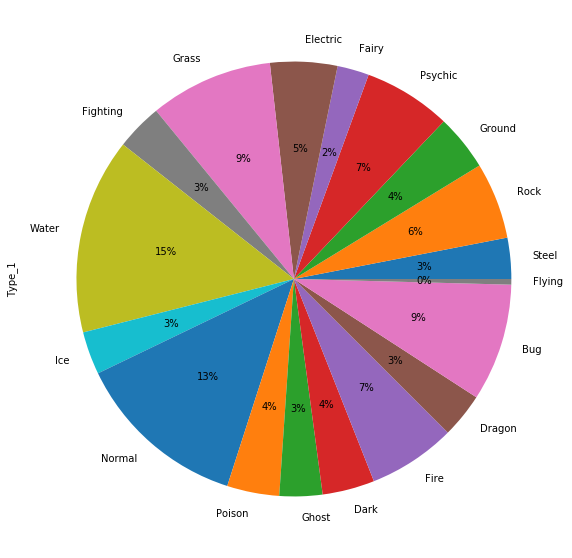

In [10]:
#绘制饼状图
plt.figure(figsize=(30,10))
exploed = [0, 0.05, 0.08, 0]
df['Type_1'].value_counts(sort=False).plot(kind='pie',autopct='%.0f%%')


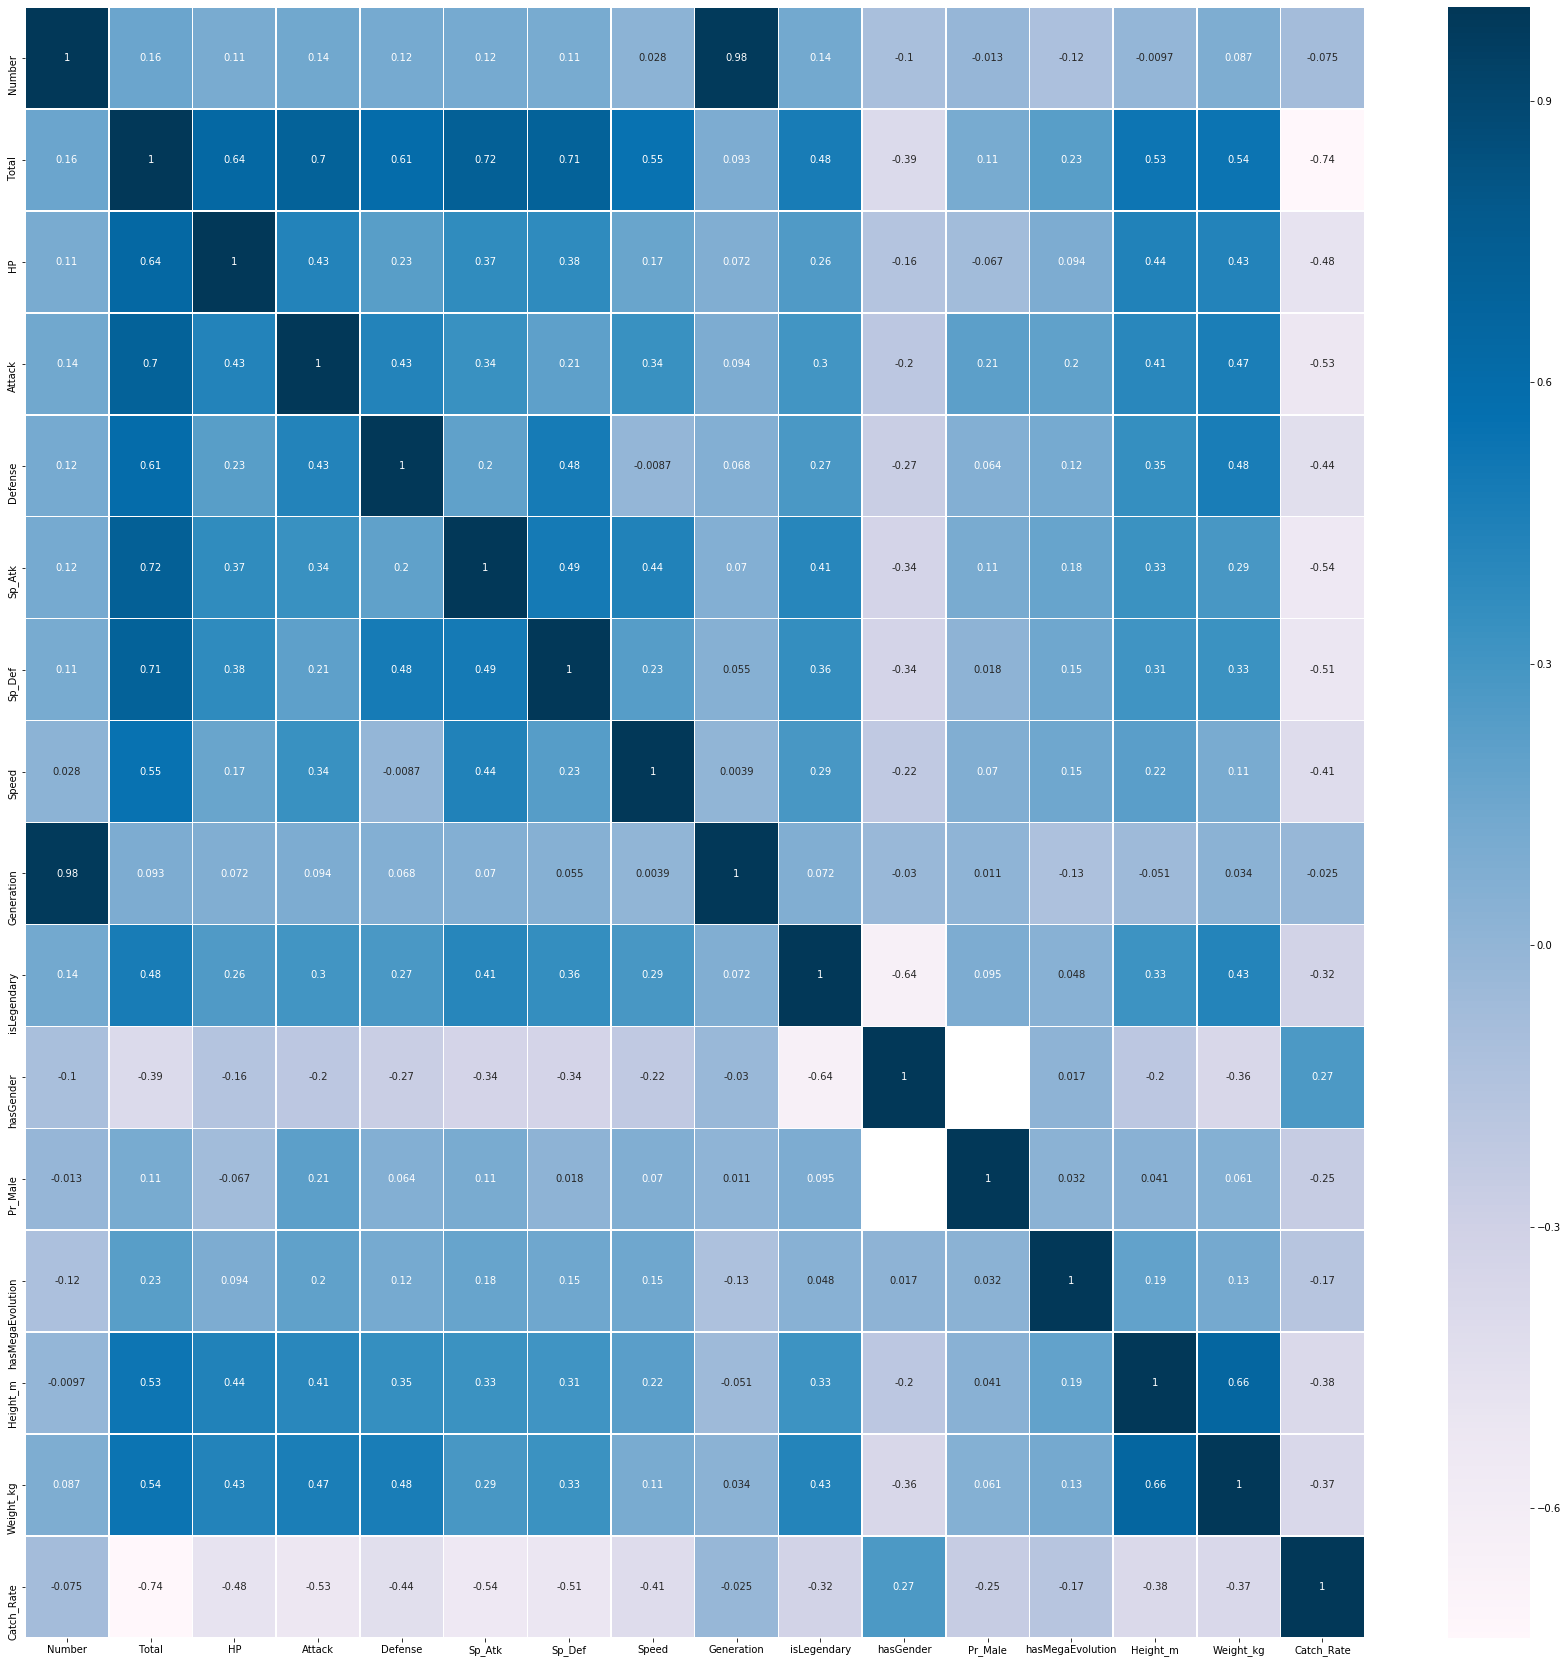

In [11]:
#绘制热力图
data_copy=df.copy(deep=True)
#计算相关系数
cor=data_copy.corr()
plt.figure(figsize=(30,30))
#作图，cmap为颜色类型，annot=False不显示数字，vmax最大值，vmin最小值,suqare=true正方形，linewidths划分每个单元格的行的宽度，
sns.heatmap(cor,annot=True,cmap='PuBu',linewidth=.5)
plt.show()